# Shashwat Jhunjhunwala_19A1HP132

In [1]:
import pandas as pd #Loading Libraries
import numpy as np #Loading Libraries

adv = pd.read_csv(r'Advertising.csv') #Importing Dataset

#Checking Datatype
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [2]:
#Column "Day" is in object form instead of str type

type(adv['Day'][1]) #These Characters are in str format in as python datatype.

str

In [3]:
#Identifing Nulls and NaN
adv[adv.TV.isnull()] #Identifing Nulls and NaN in 'TV'

,Sno,TV,Radio,Newspaper,Day,Sales
68,69,NaN,27.5,11.0,NaN,12.8


In [4]:
adv[adv.Radio.isnull()] #Identifing Nulls and NaN in 'Radio'

,Sno,TV,Radio,Newspaper,Day,Sales
42,43,293.6,NaN,1.8,NaN,10.4


In [5]:
adv[adv.Newspaper.isnull()] #Identifing Nulls and NaN in 'Newspaper'

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2


In [6]:
adv[adv.Day.isnull()] #Identifing Nulls and NaN in 'Day'

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2
42,43,293.6,NaN,1.8,NaN,10.4
68,69,NaN,27.5,11.0,NaN,12.8


In [7]:
adv[adv.Sales.isnull()] #Identifing Nulls and NaN in 'Sales'

,Sno,TV,Radio,Newspaper,Day,Sales


In [8]:
#Count of Missing Values = 3

adv = adv.dropna() #Dropping rows
adv.info() #Confirming Number

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [9]:
#Encoding Categorical Variables which is under Days Column
adv.Day.unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [10]:
xColumns = ['TV','Radio','Newspaper','Day'] 
categoricalColumns = ['Day']          
encodeAdv = pd.get_dummies(adv[xColumns], columns = categoricalColumns, drop_first=True) #Replacing categorical variables into Binary Columns and
#removing 'Day_Holiday'
encodeAdv.columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

In [11]:
#Desciptive Summary for all Variable together.
adv.describe()

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [12]:
encodeAdv.describe() #Summary including Days and Excluding Sales

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000


# Visualisation

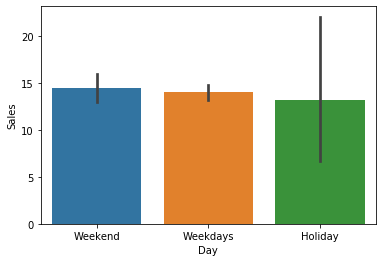

In [13]:
#importing Libraries

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

sn.barplot(x = 'Day', y = 'Sales', data = adv);  #For bargraph

Represents that the difference between the sales wrt to Day is very less. However, the confidence level varies.

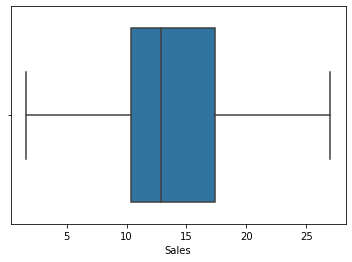

In [14]:
sn.boxplot(adv['Sales']); #For BoxPlot

There are no Outliers

# Spliting the Dataset into Train:Test = 70:30

In [15]:
#importing funtion from libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = sm.add_constant(encodeAdv)    #adding constant to the dataset and copying the set to X
Y = adv['Sales']           #Copying the Sales to Y

#Spliting the dataset, 0.7 represents 70:30 ratio, 42 is given random state
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7,random_state = 42 )

# Building Model

In [16]:
advModel1 = sm.OLS(train_y,train_X).fit()
advModel1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.016  
Dependent Variable: Sales            AIC:                840.4127
Date:               2020-08-12 20:39 BIC:                857.9326
No. Observations:   137              Log-Likelihood:     -414.21 
Df Model:           5                F-statistic:        0.5746  
Df Residuals:       131              Prob (F-statistic): 0.719   
R-squared:          0.021            Scale:              25.886  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         11.9895    3.6627   3.2734  0.0014   4.7438  19.2352
TV             0.0111    0.0073   1.5323  0.1279  -0.0032   0.0255
Radio         -0.0211    0.0331  -0.6390  0.5239  -0.0865   0.0443
Newspaper      0.0092    0.0234   0.3942  0.6941  -0.0370   0.0554
Day_Weekdays   0.9555    3.1986   0.2987  0.7656  -5.3720   7.2830
Day_Weekend   -0.2307    3.1141  -0.0741  0.9411  -6.3911   5.9296
-----------------------------------------------------------------
Omnibus:              1.252        Durbin-Watson:           2.145
Prob(Omnibus):        0.535        Jarque-Bera (JB):        1.345
Skew:                 0.194        Prob(JB):                0.510
Kurtosis:             2.709        Condition No.:           2187 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

R-squared says only 1.7% of Sales is explained. Adj-R-sqaured is negative. Prob(F-stat) is greater than 0.05, hence we accept the null hypothesis and the model is not a good fit. Significant Variables are Days_Weekdays and Days_Weekends only. We need to improve model by removing variables.

### Multi-Collinearity

In [17]:
xColumns = encodeAdv.columns #Saving Columns of Dependent Variable

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor             #importing Package
def get_vif_factors( X ):                                                              
    vif = [ variance_inflation_factor( X.values, i ) for i in range( X.shape[1] ) ]    #Loop to calculate Variance
    vif_factors = pd.DataFrame()                                                       
    vif_factors['column'] = X.columns                                                  #Creating Column for columns Names
    vif_factors['vif'] = vif                                                           #Adding respective VIF
    return vif_factors                                                                 #Return DataFrame

In [19]:
vif_factors = get_vif_factors( X[xColumns] )    #Calling function
vif_factors                                     

,column,vif
0,TV,5.972512
1,Radio,3.930583
2,Newspaper,3.499641
3,Day_Weekdays,4.513938
4,Day_Weekend,4.048673


In [20]:
highVIF = vif_factors[vif_factors.vif > 4].column #finding columns with high vif
highVIF 

0              TV
3    Day_Weekdays
4     Day_Weekend
Name: column, dtype: object

In [21]:
columnsToDelete = ['TV','Day_Weekend','Day_Weekdays'] #Columns to be deleted

In [22]:
xNewColumns = list(set(xColumns)-set(columnsToDelete)) #Removing columns
                  

In [23]:
#VIF are less than 4, hence running new model

train_X=train_X[xNewColumns]                 #Changing to new columns only
advModelTwo = sm.OLS(train_y,train_X).fit()  #Running the new model
advModelTwo.summary2()                      

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.668   
Dependent Variable:     Sales            AIC:                         981.0762
Date:                   2020-08-12 20:39 BIC:                         986.9161
No. Observations:       137              Log-Likelihood:              -488.54 
Df Model:               2                F-statistic:                 138.6   
Df Residuals:           135              Prob (F-statistic):          1.87e-33
R-squared (uncentered): 0.673            Scale:                       74.349  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Newspaper      0.1608        0.0357      4.5038      0.0000      0.0902      0.2315
Radio          0.2559        0.0478      5.3569      0.0000      0.1614      0.3503
------------------------------------------------------------------------------
Omnibus:                  0.577             Durbin-Watson:               1.893
Prob(Omnibus):            0.750             Jarque-Bera (JB):            0.586
Skew:                     -0.152            Prob(JB):                    0.746
Kurtosis:                 2.900             Condition No.:               3    
==============================================================================

"""

New Model has Adj.R.sqr explains 67.2% model. 70% is required. Prob(F-Stat) is less than 0.05 which we means we reject null hypothesis and Sales is dependant on Radio adn Newspaper which shows that model is a very good fit.

# Residual Analysis

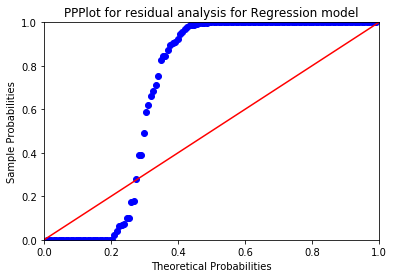

In [24]:
#Libraries are already imported
probPlot = sm.ProbPlot(advModelTwo.resid); # Returns Residual ie difference between observed and fitted values.
probPlot.ppplot(line='45');                # Sets the Normal line to 45 degree
plt.title("PPPlot for residual analysis for Regression model") 
plt.show() 

The points are not close to the red line which shows that the errors are not distributed normally.

### Scatter Plot of Residual Analysis

In [25]:
def getStandVals( vals ):      
    return (vals - vals.mean())/vals.std()    

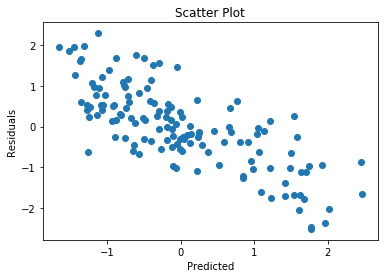

In [26]:
plt.scatter(getStandVals(advModelTwo.fittedvalues),getStandVals(advModelTwo.resid)) #Generate Scatter plt errors vs prediction
plt.title("Scatter Plot") 
plt.xlabel("Predicted")   
plt.ylabel("Residuals")   
plt.show()                

Not Parallel Line - Heteroscedasticity - Residuals doesnt have constant variance

# Outlier Analysis

In [27]:
from scipy.stats import zscore  
adv['zScoreSales'] = zscore(adv.Sales) #Adding new Column 'zScoreSales' and putting z-scores for outlier
adv[(adv.zScoreSales>3.0)|(adv.zScoreSales<-3)] #Printing Outliers with zscore of > 3 or < -3

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales


No Outliers Found from Z-Score

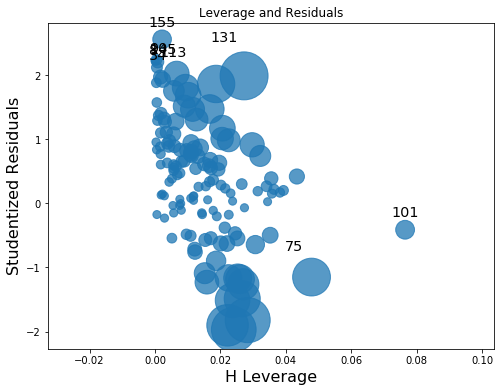

In [28]:
#Leverage for Finding Influencing observations

from statsmodels.graphics.regressionplots import influence_plot #impoting package
fig, ax = plt.subplots( figsize=(8,6) )   #Set the size
influence_plot( advModelTwo, ax = ax )    #making influence plot
plt.title( "Leverage and Residuals")      #Setting title
plt.show();                               #Showing Graph

Leverage Value of More than 3(k+1)/n ie 3(2+1)/137 = 0.065 approx. Hence, observations at 101 should be removed

In [29]:
adv[adv.index.isin([101])] #Printing the observations that needs to be removed

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales
101,102,296.4,36.3,100.9,Weekend,22.1,1.544276


In [30]:
newTrainX = train_X.drop( [101], axis = 0) #Dropping observation from x-axis
newTrainY = train_y.drop( [101], axis = 0) #Dropping observation from y-axis

In [31]:
advModelThree = sm.OLS(newTrainY,newTrainX).fit()  #Running the new model
advModelThree.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.663   
Dependent Variable:     Sales            AIC:                         974.7692
Date:                   2020-08-12 20:39 BIC:                         980.5946
No. Observations:       136              Log-Likelihood:              -485.38 
Df Model:               2                F-statistic:                 134.6   
Df Residuals:           134              Prob (F-statistic):          8.83e-33
R-squared (uncentered): 0.668            Scale:                       74.810  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Newspaper      0.1647        0.0370      4.4473      0.0000      0.0914      0.2379
Radio          0.2529        0.0484      5.2212      0.0000      0.1571      0.3488
------------------------------------------------------------------------------
Omnibus:                  0.748             Durbin-Watson:               1.908
Prob(Omnibus):            0.688             Jarque-Bera (JB):            0.722
Skew:                     -0.174            Prob(JB):                    0.697
Kurtosis:                 2.918             Condition No.:               3    
==============================================================================

"""

# Testing Model

In [32]:
predY = np.power( advModelThree.predict( test_X[newTrainX.columns] ), 2) #Saving Predicted Value in predY

In [33]:
#RMSE For Validation
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(predY, test_y))

201.0017589136991

# Manual Calculation

In [34]:
adv[2:3] #picking one Data

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales
2,3,17.2,45.9,69.3,Weekdays,10.3,-0.734109


Model 1 - Equation --> Sales = 8.57 + 0.0066*TV + 0.0056*Radio - 0.0212*Newspaper + 4.7365*Day_Weekday + 3.841*Day_Weekend

In [35]:
8.57+0.0066*17.2+0.0056*45.9-0.0212*69.3+4.7365

12.207899999999999

Model 2 - Equation --> Sales = 0.2951Radio + 0.1138Newspaper

In [36]:
0.2951*45.9 + 0.1138*69.3

21.43143